In [36]:
import numpy as np
import pandas as pd
import time
import re
import string
from textblob import TextBlob
from datetime import datetime
from dateutil import parser
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [7]:
df = pandas.read_csv('pol_accounts.csv')

,Unnamed: 0,id,screen_name,description,created_at,location,is_verified,latest_following_count,latest_followers_count,latest_status_count,array_agg,num_tweets
0,0,2962813893,RepStefanik,Official Twitter Account for Congresswoman Eli...,2015-01-05 22:17:51,NaN,t,246,9499,2082,"{congressperson,Republican,republican}",2108.0
1,1,1058256326,RepChrisCollins,Proud to represent New York’s 27th Congression...,2013-01-03 16:55:01,NaN,t,587,10874,2916,"{congressperson,Republican,republican}",2935.0
2,2,17494010,SenSchumer,Official account of Senator Chuck Schumer - Ne...,2008-11-19 20:10:20,"New York, NY",t,26578,522353,10076,"{senator,Democrat,democrat}",4630.0
3,3,2955485182,SenatorRounds,U.S. Senator for South Dakota,2015-01-01 20:23:49,"Pierre, South Dakota",t,542,11180,1622,"{senator,Republican,republican}",1648.0
4,4,339852137,SupJaniceHahn,Proudly representing the 4th District of Los A...,2011-07-21 19:22:22,"San Pedro, CA",t,1738,13050,4218,"{congressperson,Democrat}",3646.0


In [20]:
df = df[df['array_agg'].str.contains(r"\b(?:senator|governor|congressperson)\b", regex=True)]

In [22]:
rep = df['array_agg']
count = 0

In [26]:
for r in rep:
    if "Democrat" in r:
        count+=1

In [9]:
tweets = pandas.read_csv('pol_tweets.csv', sep=';')

,id,user_id,created_at,tweet_text,hashtag_entities,url_entities,favorites_count,retweet_count,quoted_status_id,in_reply_to_status_id
0,488814426666315776,1061385474,2014-07-14 22:36:55,I enjoyed speaking with @actuary_dot_org about...,{CARECorps},{},3,3,NaN,NaN
1,834855385416757249,2970279814,2017-02-23 20:00:09,We are concerned &amp; actively seeking answer...,{},{http://bit.ly/2lzZl8M},23,12,NaN,NaN
2,659061646556557312,240812994,2015-10-27 17:38:35,"RT @NYCEDC: Thanks to @BPEricAdams, @CMMathieu...",{},{},0,6,NaN,NaN
3,501772450859061248,1321432124,2014-08-19 16:47:29,How @GovernorCorbett's $1 Billion in cuts to e...,"{PublicSchools,pagov}",{http://t.co/Juw6dKWBe2},4,10,NaN,NaN
4,781520572937363457,2963445730,2016-09-29 15:46:39,RT @GovExecEvents: ICYM @GerryConnolly &amp; @...,{FITARAForward},{},0,4,NaN,NaN


In [48]:
freq = tweets['user_id'].value_counts().to_frame()

,user_id
131018989,22455
2421067430,7876
20508720,7447
134249298,5885
933261786,5774


In [49]:
freq.columns = ['num_tweets']

,num_tweets
131018989,22455
2421067430,7876
20508720,7447
134249298,5885
933261786,5774


In [50]:
freq['id'] = freq.index

In [55]:
df = df.merge(freq, on = 'id', how = 'left')

In [57]:
df['num_tweets'].describe()

count      664.000000
mean      2502.338855
std       1524.968174
min          1.000000
25%       1396.750000
50%       2734.000000
75%       3497.000000
max      22455.000000
Name: num_tweets, dtype: float64

In [61]:
df.to_csv('pol_accounts.csv')

In [63]:
tweets['retweet_count'].describe()

count    1.661553e+06
mean     1.466164e+02
std      5.416083e+03
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      3.303375e+06
Name: retweet_count, dtype: float64

In [66]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from google.oauth2 import service_account

creds = service_account.Credentials.from_service_account_file('key.json')
# Instantiates a client
client = language.LanguageServiceClient(credentials = creds)

def analyze(text):
    doc = language.types.Document(
            content=text,
            type=language.enums.Document.Type.PLAIN_TEXT)
    analysis = client.analyze_sentiment(document=doc)
    score = analysis.document_sentiment.score
    mag = analysis.document_sentiment.magnitude
    time.sleep(.100)
    return score,mag


In [160]:
text = final['tweet_text'].dropna().tolist()

In [113]:
final['tweet_text'] = final['tweet_text'].dropna()

In [120]:
text = final['tweet_text'].tolist()

In [155]:
ahhh = final['tweet_text'].apply(processTweet)

TypeError: expected string or buffer

In [157]:
final['tweet_text'].apply(processTweet)

congrats chief master sgt amy giaquinto ballston spa being promoted command chief air ntl guard 
icymi ' working legislative initiatives help military families when facing permanent change station moves 
icymi: students register now participate the sign here: congressionalappchallenge. 
the hearing the essential role today' economy will streamed 1pm 
today congress opens the 115th session. looking forward continuing our hard work behalf : 
today the 36th anniversary the lake placid! commemorated this event house floor last year: 
10am will holding open hearing russian interference the 2016 election. watch here: 
thanks and for showing their support for last night! 
had great visit graceway farms lowville today! 
will continue support the biomass facility fort drum which 100% energy independent and self-sustainable. 
great see glens falls, watertown, plattsburgh, and ogdensburg the top cities for ! 
joined colleagues the pay tribute the thousands lives lost / 
access broadband critical 

rep. elise stefanik spends day with ballston spa students - saratoga today newspaper: rep. elise stefanik spen... http...
proud join and over other senators representatives letter usda : low milk prices 
honored featured "new voice for 2015"! 
north country officials, canada for economic development meetings 
. named chair house subcommittee emerging threats 
sign for weekly newsletter stay date work congress behalf constituents: 
"every day the week will put the interests the district first." 
stay date with work congress and across , sure subscribe weekly updates here: 
pic: hit the slopes with whiteface mountain' host patrol this morning 
good read page today our first millennial task force hearing 
next stop for reading kindergartners 
more can done fight the epidemic. are working combat this abuse and beyond 
intro' important legislation allow employers make tax free payments towards their employees' student loans: 
tomorrow ' chairing hearing -submit questions using 
. . lawrence

toured share support for manufacturing - great meet the team! 
good news for plattsburgh' transportation manufacturing sector! growing with the addition quebec-based delastek

take look some the amazing artwork submitted our watertown office for the congressional art competition! 
happy the house just passed the sav act unanimous vote 403- 
were happy present with the award legislative excellence our nova and prevost bus...
happy ! will continue uphold oath support and defend the constitution for 
let' this. 
icymi: stefanik introduces first bill, via 
must read editorial today' paper endorsing ..-canadian preclearance legislation -- 
will also hear how technology empowering individuals support themselves economically giving people the flexibility they desire
. announces winner annual congressional art competition ( 
icymi: first post thanksgiving with the 10th mountain division 
icymi: proud lead bipartisan group freshmen lawmakers calling for vote medical device tax repeal 
wishing y

...
wny delegation local advocates fought hard return -135 tanker mission nfars 
there are smarter, more bipartisan ways replace president obama' sequester than higher taxes. 
battle the growing opioid-crisis improve treatment support options, need continue working together. 
wny knows all too well that free trade not fair trade. committed leveling the playing field create jobs. 
. thanks for -hosting last nights national eagle scout association event. was honor invited https:/...
the house back session this week. take look this week' legislative business here: 
thoughts and prayers are with all the washington navy yard victims and their families.
throwing back the high school days for 
out touch and unaccountable the administration' approach its health care via .
today house republicans will vote create ,000 jobs and add billion the economy . 
thank you for following twitter. for more updates and information make sure "like" facebook page . 
visit legislation that important you. and t

exchanges, premiums may low, but other costs can high, finds .
yesterday was the 105th anniversary the here congress, proud chair the scouting caucus. 
for - website has resources and information that may help you 
albion, getting ready chair sbcmte field hearing rural broadband. learn more: .
yrs the admin has increased regulatory costs billion, more than the gdp states ...
fact: there are almost four million americans who have been unemployed for six months longer: 
voted support .. 158, which will help the .. identify stop foreign fighters with western passports from entering the ..
cms still can' produce shop enrollment data. receives answers...
great meet with students from albion and lyndonville high schools. hope they enjoy their time .. 
thursday niagara county holding senior information and resource fair from - the cornell cooperative extension lockport.
celebrating boy scout troop ' 75th anniversary with supervisor jim brick the perry historical society. 
watch live: house cm

"obamacare putting millions part-time workers risk seeing cut hours: study" via . 
congrats sheriff dougherty, sergeant arms--very well deserved. thankful for your service livco 
celebrating years the penn dixie education center hamburg. visited / son years ago, supported ever since 
looking forward our service academy night. great opportunity hear from service academy reps. for mor... 
you have question regarding you want ask the white house tomorrow?
thank you everyone who filled out and sent back their 2013 congressional action survey. ... 
read full statement tonight' votes open national parks fully fund nih 
still "really confused" about ? new poll shows you aren' alone. via .
today' tax code contains almost four million words. need simpler, fairer tax code that eliminates loopholes 
years post recession roadblocks remain for , tell what obstacles your facing! ...
had great time waterport and medina area ! our third 
touring the niagara falls afs. base staffed dedicated people led

half our budget already goes the military. 
watered down ban still ban. 
student loan debt has surpassed credit card debt-- must make college more affordable and not leave grads htt...
get the facts from ' got his sleeves rolled powerpoint. don' miss : 
first stop johnstown always bakery the fulton county airport. the best! 
'bots act' passes the senate, will crack down broadway cyber scalpers 
you can see little history solon where major gen samuel hathaway built his house the mid 19th century. 
student loan debt has surpassed auto loan debt. higher has put too many grads . this must end 2016. https://....
will gop confirm cabinet full supporters when their party' nominee campaigned against ? 
firing sally yates underscores how impt have attorney general who' stand the whitehouse when they violate the law.
? simple: there none. time for republicans get real about ...
pres trump' plans are based nothing keep safe fix our immigration system humane effective way.
and the american people 

. wants all products this government website reviewed. here' why: ...
new markets tax credit extension good news for rochester' sibley bldg 
minetto was originally founded company town columbia mills textile factory. 
. during meeting with judge gorsuch, refused answer important questions https:...
doesn' just cut , guts medicaid. but don' just take from : 
senate republicans have now blocked president obama' supreme court nominee for 125 days--longer than any history. https:/...
may need more red tailed hawks our airports! 
pushing new bill that helps ensure that every drop water from daycare center school' faucet should pure, safe clean.
this letter caused the gop silence tonight. you think they should 
may raining, but the coalition out full force with 
learn more about the terrorist attack berlin with heavy hearts, pray for the victims, their families for the german people.
affected roughly 45k homes, plus schools, biz community cntrs. later are still fighting .
and other mass shoo

this underhanded assault montana' outdoor economy way life. 
matter who the president , science science and truth truth 
from the boat launch itaska you can enjoy day fishing the tioughnioga river running thru the town barker. 
nra, gun-loving republican cohorts refuse stop terrorists from buying guns the .. ...
from president trump: who' buying access? 
the opioid and heroin abuse crisis across the national emergency need fight back today. 
from -1pm today, join , and many our -sponsors supporters for twitter storm urging congress...
great morning talking tech nyc / 
pinckney was named for patriot, revolutionary war veteran, gov ambassador thomas pinckney. 
this nation was built immigrants. they will always welcome here. 
soon ' ask sect. nom questions hearing clarify his priorities. watch: htt...
enjoy music rotary park middletown, the town hartland tomorrow from -7pm 
. coming stadium for the last time. hope also visits his central park.... 

looks like phone companies like are gett

shorter chuck schumer: republicans blocked merrick garland for year, why should confirm gorsuch while fbi investig...
this budget shifts the burden off the wealthy special interests puts the backs the middle class those trying get there.
broad channel floods frequently that neighbors honk car horns warn each other rising tides 
tell / 
shocked sad hear pres. elizabeth garrett passed away battling cancer. thinking her husband, family the big red community.
one last time wear the red, white and blue. thank you all the fans and course teammates. will have fun toni...
' hard believe that our gop colleagues voted allow suspected terrorists buy guns. will keep pushing till they see the light.
' with you and with everyone across america delivering pres trump vociferous his exec action... 
from bbs like maplewood house alpaca themed wedding venues like marlow farm, memories are made preston, 
the bill huge, some good some bad, but certainly includes funding for programs families care about mos

for the 2nd time this year staten island jcc was threatened. they have music institute, food pantry, senior center daycare.
great see many young ppl from around the country come 
today marks years since president johnson signed the voting rights act, the most successful civil rights law. ' ...
the best antidote the horror that occurred during 'shoah never forget long god breathes air into our lungs. 
. highlighting troubling stats heroin abuse, cited off-duty buffalo police officer overdose https://....
. ' commonsense prevent those terror watchlist from buying guns. 
icymi calls use photos emergency alerts like one identifying the bombing suspect: ...
fact: plan harms american manufacturing. will fight support urge next admin same.
-based takes stand , says they won' mark women' products like deodorant, razors 
fixing this bottleneck has been the top priority nys rail project for decades will make upstate travel faster. 
can' partisan. the stakes are too high. will work across aisle i

column this week regulatory reform and improving chemical safety laws. you can find here: 
house just passed first step toward repealing 
had the chance meet / . carson recently talk about his vision for going forward. 
high school juniors and seniors, and want you apply for this: ...
audit necessary improve healthcare for tribal members. 
congrats dept. veterans affairs your "outstanding state program" award from 
the budget resolution introduced the senate gop today will get government working again. 
wishing all south dakotans safe and happy halloween! 
' live today for our monthly "ask the senator" segment. tune am1240 online: 
opening statement today' epw subcom hearing oversight regulatory impact analyses regs 
hoping everyone staying safe and warm today. please careful the roads. 
' ozone plan could the largest regulatory burden history. 
talked with this morning after hearing address congress. you can listen here: 
just reintroduced the act. bill would repeal outdated, offensiv

join she presents the opening reception for the congressional competition. 2pm-...
congratulations and being selected jointly receive port person the year award!
cynthia banks, director champion for our aging population, including individuals who suffer... 
will suffering brought change their minds? same people who voted slash food stamps billion dollars.
this shameful. must work ensure that every woman has access the health care they need fight cancer. 
officially starts sep but are already welcoming vice admiral tyson and her fleet town! 
thank you, justice kennedy and all the justices who chose stand the right side history. 
. gives her : things are better! 
congratulations all the winners the foundation film festival! 
president obama: "building new roads, and bridges, and schools, and ports--that creates jobs." 
winter shelter hours have been extended most shelters this weekend. 
tune into soon! ' speaking live from our sit- the house floor demanding vote gun violence. 
looks like

house passed bill honor wwii merchant mariners. senators, please pass before too late.... 
let' keep marching until one judged anything but the content their character. ...
many communities are more likely have health problems like and less likely have access quality .
ww2 merchant marine veterans are storming the hill! and telling their story 
" could see myself them." --obama helping young men color reach their full potential 
signed the petition because one working full-time job should live poverty. 
tonight will holding community meeting with residents affected the recent oil spill. 
just received the congressional scorecard. proud one the members get perfect score!
proud sponsor that important legislation!

ebola not cause for panic but must provide public with facts and ensure healthcare workers receive training. 
house passed bill honor wwii merchant mariners. senators, please pass before too late.... 
used 100m times since took effect yrs ago, the was great first step. but ther

the six months since , more than 5000 americans have lost their lives .
thank you for cosponsoring hr563! this veterans day, let . 
compton mourning the loss little baby autumn, shot while sleeping her crib last night. thoughts and prayers are with her parents
heading the witness the president standing / american workers and taking action . 
years after lost his medals house fire, proud present . bourgeois with the medals earned 
first 'term' served: congratulations 
. supports cal cartage workers and port drivers strike end ! http...
have you voted yet? "like" your favorite photos our community this year' facebook photo contest! 
' testifying front the rules committee how can help ww2 merchant mariners. tune 
fines few thousand dollars are nothing more than the cost doing business for these companies. add the 
thank you for supporting common-sense gun laws ...
too many port truck drivers are underpaid and overworked. unjust and dangerous situation. 
spoke colleagues the house floor ab

this week, the voting . let know you support balanced budget amendment here: .
looking forward working with everyone the 113th! 
the house has passed , bill cosponsored reform america' broken health care system. statement: 
the app now ,000 days old. the now top ,000 pages. ' past time build 
looked forward getting sunflower seeds & beef jerky when was deployed. what other like get? 
happy birthday old glory, our everlasting symbol freedom, and happy 239th the 
today voted protect job creators from another job-killing . read why: 
military spouse appreciation day, heartfelt thank you all those who support the men women our military 
thanks for bringing speak . 
today, visited / the wine institute discuss legislative and regulatory issues impacting ' wine industry. 
today 10am /7am : begins mark- the act . watch online: 
today' effort new leadership step the right direction ending its cycle wasteful spending. 
deep snow prompts governor declare drought over. where the for south--delta f

TypeError: expected string or buffer

In [154]:
temp = final['tweet_text'].tolist()
processed = list()
for tweet in temp:
    t = processTweet(tweet)
    processed.append(t)


TypeError: expected string or buffer

In [156]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    type(tweet)
    tweet = re.sub(r'\&\w*;', '', tweet)
  
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)

    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)

    # To lowercase
    tweet = tweet.lower()

    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)

    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
  
    # Remove Punctuation and split 's, 't, 've with a space for filter
    #tweet = re.sub(r'[' + tweet.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)

    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)

    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
   
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    #tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
 
    return tweet


In [73]:
first700000 = final.iloc[:800000]['tweet_text'].tolist()

In [37]:
next700000 = text.iloc[700000:].tolist()

In [25]:
final = pandas.merge(df, tweets, left_on = "id", right_on = "user_id", how = "inner")

In [41]:
final = pandas.read_csv("mergedProjectData.csv")

/Users/ally_picker/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
firstHalf = [analyze(text) for text in first700000]##first 8 hundred thousand tweets

RetryError: Deadline of 600.0s exceeded while calling <functools.partial object at 0x10f054208>, last exception: 504 Deadline Exceeded

In [173]:
blob = TextBlob("I will continue to support the biomass facility on Fort Drum which is 100% energy independent and self-sustainable. https://t.co/KNLz4ELX40")

I will continue to support the biomass facility on Fort Drum which is 100% energy independent and self-sustainable. https://t.co/KNLz4ELX40


In [ ]:
sentiment = list()


for tweet in tweets_without_url:
    tweet = str(tweet)
    blob = TextBlob(tweet)
    sentiment.append(blob.sentiment)

In [202]:
temp2 = final['tweet_text'].tolist()
temp2 = temp2[758999:]

In [39]:
sentiment2 = list()
for tweet in tweets_without_url:
    tweet = str(tweet)
    blob = TextBlob(tweet)
    sentiment2.append(blob.sentiment.polarity)

In [213]:
allSA = sentiment + sentiment2

In [220]:
cutOffData = final.drop(final.tail(435558).index)

In [1]:
cutOffData['sentiment'] = allSA

NameError: name 'allSA' is not defined

In [225]:
cutOffData.to_csv("tweetsWithPoliticiansAndSentiment")

In [10]:
pleaseWork = pandas.read_csv("tweetsWithPoliticiansAndSentiment.csv")

In [11]:
sentiment = pleaseWork.sentiment

In [23]:
result = re.search('polarity=(.*),', sentiment[4])
result.group(1)

'-0.2916666666666667'

In [25]:
temp = pleaseWork['sentiment'].tolist()

In [26]:
newList = list()
for string in temp:
    match = re.search('polarity=(.*),', string)
    newList.append(match.group(1))

In [20]:
def getPolarity(string):
    match = re.search('polarity=(.*),', string)
    return result.group(1)

In [48]:
pleaseWork['polarity'] = sentiment2

In [50]:
pleaseWork.to_csv('dataWithPolarity.csv')

In [44]:

tweet_text = final['tweet_text'].tolist()
tweets_without_url = []
for tweets in tweet_text: # change from test to actual list of tweets
    tweets = str(tweets)
    tweets = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', tweets, flags=re.MULTILINE)
    tweets = re.sub(r'@\S+', '', tweets)
    tweets = tweets.replace('&amp;', '')
    tweets_without_url.append(tweets)

In [4]:
currentData = pd.read_csv('dataWithPolarity.csv')

/Users/ally_picker/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
corr = currentData[['created_at_y','location', 'favorites_count', 'retweet_count', 'polarity', 'num_tweets', 'latest_followers_count', 'latest_following_count']]

In [33]:
corr = corr.dropna(subset=['created_at_y'])
#corr['created_at_y'] = corr['created_at_y'].apply(lambda x: parser.parse(str(x)))

In [34]:
corr.corr()

,favorites_count,retweet_count,polarity,num_tweets,latest_followers_count,latest_following_count
favorites_count,1.000000,0.054535,-0.012065,0.018998,0.140392,0.035405
retweet_count,0.054535,1.000000,-0.000156,0.004482,0.011201,0.006274
polarity,-0.012065,-0.000156,1.000000,-0.013734,-0.009097,0.012900
num_tweets,0.018998,0.004482,-0.013734,1.000000,0.243950,0.223039
latest_followers_count,0.140392,0.011201,-0.009097,0.243950,1.000000,0.475114
latest_following_count,0.035405,0.006274,0.012900,0.223039,0.475114,1.000000


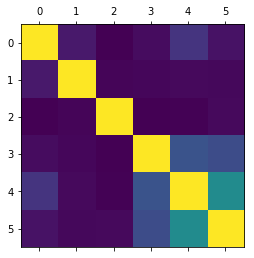

In [24]:
plt.matshow(corr.corr())

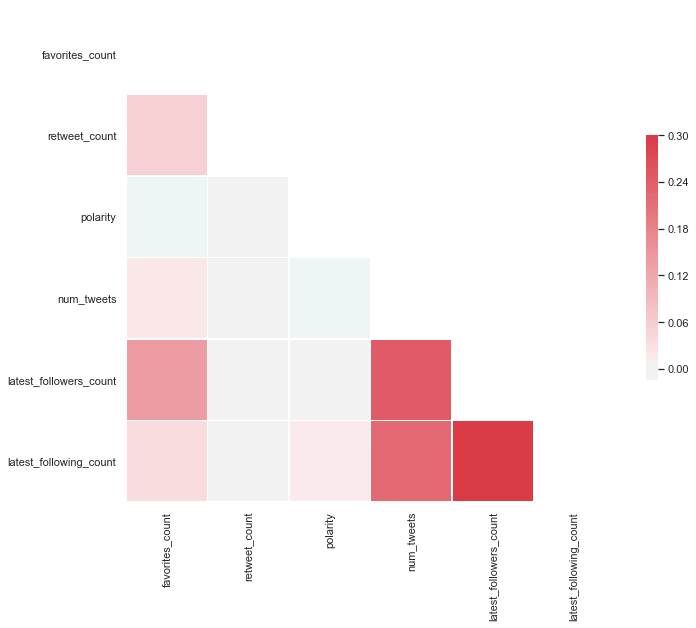

In [31]:
sns.set(style="white")


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
corr.describe()

,favorites_count,retweet_count,polarity,num_tweets,latest_followers_count,latest_following_count
count,1.021396e+06,1.021396e+06,1.110929e+06,1.110929e+06,1.110929e+06,1.110929e+06
mean,4.461751e+01,1.071956e+02,1.513619e-01,3.062751e+03,7.949994e+04,2.697440e+03
std,7.595139e+02,5.786850e+03,2.930310e-01,9.206973e+02,2.938538e+05,8.281216e+03
min,0.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00,8.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,2.670000e+03,1.054700e+04,5.770000e+02
50%,1.000000e+00,3.000000e+00,0.000000e+00,3.261000e+03,1.888300e+04,1.089000e+03
75%,6.000000e+00,9.000000e+00,2.861111e-01,3.607000e+03,4.017800e+04,2.177000e+03
max,1.937670e+05,3.303375e+06,1.000000e+00,5.063000e+03,2.812707e+06,9.212100e+04
